In [1]:
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


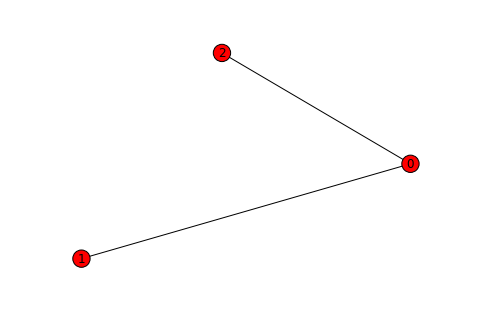

In [2]:
a = array([[0,1,1],[1,0,0],[1,0,0]])
G = nx.Graph(a)
nx.draw(G)

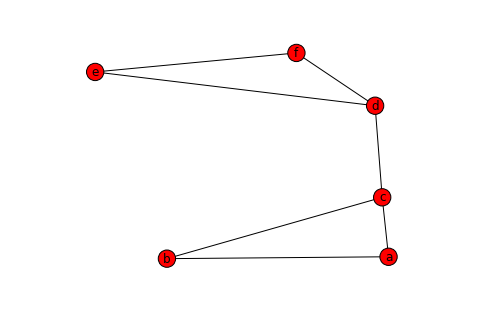

In [3]:
a = ["a b c", "b a c", "c a b d","d c e f","e d f","f d e"]
G = nx.parse_adjlist(a)
nx.draw(G)

In [4]:
A = array(nx.adjacency_matrix(G))
A

array([[ 0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  0.]])

In [32]:
def cluster(vertex, graph, alpha = 1, classified = None):
    n = graph.shape[0]
    internal_weights = copy(graph[vertex])    
    degrees = sum(graph, axis = 1)
    perimeter = sum(internal_weights)
    assert(perimeter == degrees[vertex]), "Error"
    
    if(classified is None):
        unclassified = ones(n)
    else:
        assert(len(classified) == n), "Length of classified does not match size of graph."
        unclassified = np.logical_not(classified)
        
    unclassified[vertex] = 0
    area = internal_weights[vertex]
    
    while True: 
        if(sum(unclassified) == 0):
            break
        temp_perimeter = perimeter - 2*internal_weights + degrees
        temp_area = area + internal_weights
        ratios = temp_area / (temp_perimeter + 0.000001) 
        next_vertex = np.argmax(ratios * unclassified)
        this_alpha = (area*temp_perimeter[next_vertex])/(perimeter*temp_area[next_vertex]) 
        if(this_alpha > alpha):
            break
        unclassified[next_vertex] = 0
        internal_weights += graph[next_vertex]
        perimeter = temp_perimeter[next_vertex]
        area = temp_area[next_vertex]

    return np.logical_not(unclassified)
            
A = array(nx.adjacency_matrix(G))
#A = A + diag(ones(len(A)))
this_cluster = cluster(0,A,0.1, array([0,0,0,0,0,0])) 
this_cluster

array([ True, False, False,  True, False, False], dtype=bool)

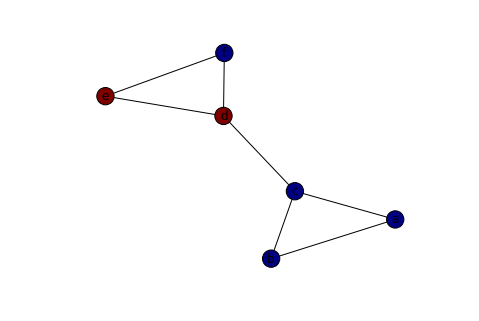

In [33]:
nx.draw(G,  node_color = this_cluster)